<a href="https://colab.research.google.com/github/nescoba/portafolio/blob/main/predicting_scores_mls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and modeling of data from MLS

## Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set()

In [2]:
# pip install itscalledsoccer

In [3]:
from itscalledsoccer.client import AmericanSoccerAnalysis

asa_client = AmericanSoccerAnalysis() 

asa_client.get_teams(leagues='mls')

Gathering all players
Gathering all teams
Gathering all stadia
Gathering all managers
Gathering all referees
Finished initializing client


,team_id,team_name,team_short_name,team_abbreviation,competition
0,0KPqjA456v,San Jose Earthquakes,San Jose,SJE,mls
1,19vQ2095K6,New England Revolution,New England,NER,mls
2,4wM42l4qjB,Chivas USA,Chivas,CHV,mls
3,9z5k7Yg5A3,Philadelphia Union,Philadelphia,PHI,mls
4,a2lqR4JMr0,Real Salt Lake,Salt Lake,RSL,mls
5,a2lqRX2Mr0,New York Red Bulls,New York,NYRB,mls
6,APk5LGOMOW,CF Montréal,Montréal,MTL,mls
7,EKXMeX3Q64,D.C. United,D.C. United,DCU,mls
8,eVq3ya6MWO,Los Angeles FC,Los Angeles FC,LAFC,mls
9,gpMOLwl5zy,Austin FC,Austin,ATX,mls


## Creating graph of points per season for top 5 clubs 

### Graph with all the teams

In [7]:
df_teams = asa_client.get_teams('mls')
df_xgoals = asa_client.get_team_xgoals(leagues='mls', split_by_seasons=True)
df_xgoals = df_xgoals.loc[df_xgoals['season_name']<2022]

big_df = pd.merge(df_xgoals, df_teams, how='inner', on='team_id')
big_df.head()

,team_id,season_name,count_games,shots_for,shots_against,goals_for,goals_against,goal_difference,xgoals_for,xgoals_against,xgoal_difference,goal_difference_minus_xgoal_difference,points,xpoints,team_name,team_short_name,team_abbreviation,competition
0,0KPqjA456v,2013,34,439,437,34,42,-8,42.9671,40.4521,2.5150,-10.5150,51,48.575,San Jose Earthquakes,San Jose,SJE,mls
1,0KPqjA456v,2014,34,390,546,34,49,-15,35.7557,54.4607,-18.7050,3.7050,30,34.751,San Jose Earthquakes,San Jose,SJE,mls
2,0KPqjA456v,2015,34,405,399,41,38,3,44.0066,40.2915,3.7150,-0.7150,47,49.868,San Jose Earthquakes,San Jose,SJE,mls
3,0KPqjA456v,2016,34,409,411,32,38,-6,40.6650,41.1194,-0.4544,-5.5456,38,45.937,San Jose Earthquakes,San Jose,SJE,mls
4,0KPqjA456v,2017,35,479,468,39,63,-24,45.8993,48.6987,-2.7994,-21.2006,46,47.366,San Jose Earthquakes,San Jose,SJE,mls


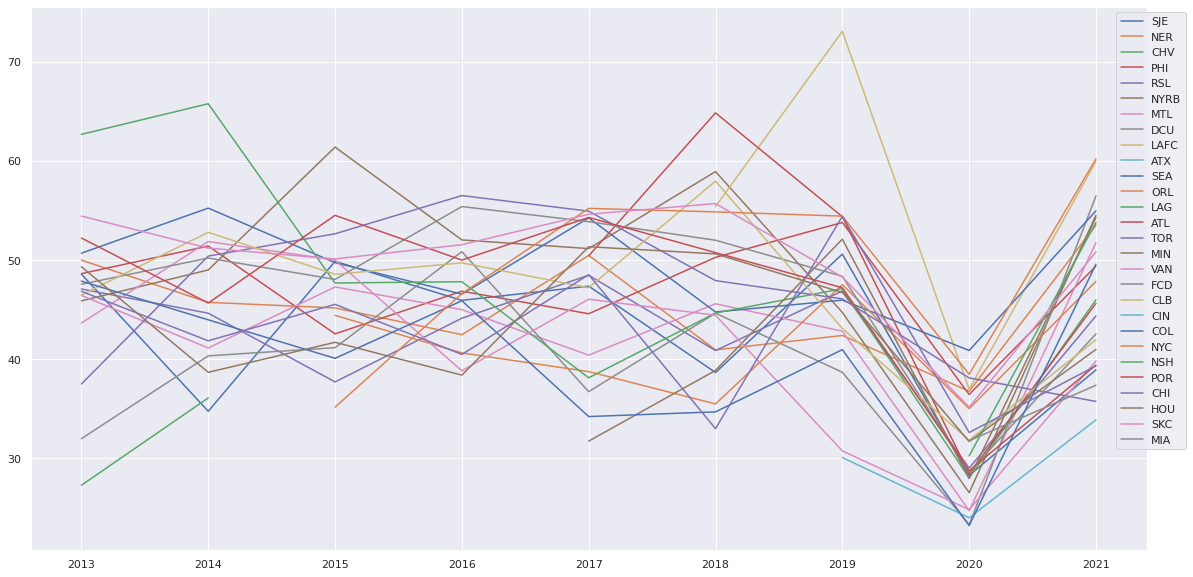

In [8]:
plt.rcParams["figure.figsize"] = (20,10)

for team in big_df['team_abbreviation'].unique():
    df_team = big_df.loc[big_df['team_abbreviation']==team, :]
    plt.plot(df_team['season_name'], df_team['xpoints'], label=team)

plt.legend(bbox_to_anchor=(1.04,1))

Too crowded

### Graph with only the top 5 teams 

In [10]:
summary_xpts=big_df.groupby('team_abbreviation')['xpoints'].mean()

In [11]:
short_summ_xpts = summary_xpts.sort_values(ascending=False)[:5]
short_summ_xpts.index

Index(['LAFC', 'SKC', 'NYRB', 'NYC', 'SEA'], dtype='object', name='team_abbreviation')

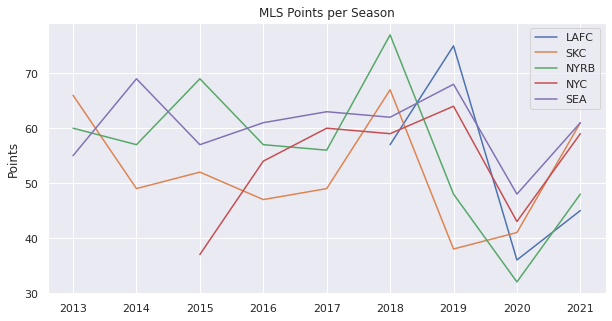

In [12]:
plt.rcParams["figure.figsize"] = (10,5)

for team in short_summ_xpts.index:
    df_team = big_df.loc[big_df['team_abbreviation']==team, :]
    plt.plot(df_team['season_name'], df_team['points'], label=team)

plt.ylabel('Points')
plt.title('MLS Points per Season')
plt.legend()

## Modeling of the SEA data 

Obtaining the SEA specific data 

In [16]:
seasons = asa_client.get_game_xgoals(leagues='mls')
sea = seasons[(seasons['home_team_id']=='jYQJ19EqGR') | (seasons['away_team_id']=='jYQJ19EqGR')]
sea.head()

,game_id,date_time_utc,home_team_id,home_goals,home_team_xgoals,home_player_xgoals,away_team_id,away_goals,away_team_xgoals,away_player_xgoals,goal_difference,team_xgoal_difference,player_xgoal_difference,final_score_difference,home_xpoints,away_xpoints
4,eVq3gvKVqW,2022-03-05 23:00:00 UTC,a2lqR4JMr0,1,2.3887,2.6652,jYQJ19EqGR,0,0.7425,0.7493,1,1.6462,1.9158,1,2.454,0.381
14,kRQadRmjqK,2022-02-28 01:00:00 UTC,jYQJ19EqGR,0,0.5315,0.5370,vzqoOgNqap,1,0.7669,0.8229,-1,-0.2354,-0.2859,-1,1.006,1.597
35,a35rL1dBQL,2021-11-24 03:30:00 UTC,jYQJ19EqGR,0,1.1956,1.2037,a2lqR4JMr0,0,0.0000,0.0000,0,1.1956,1.2037,0,0.000,0.000
44,KXMeYW06M6,2021-11-07 23:00:00 UTC,lgpMOvnQzy,1,0.8889,0.8889,jYQJ19EqGR,1,2.0900,2.1178,0,-1.2011,-1.2289,0,0.469,2.317
59,vzqo2V675a,2021-11-02 02:00:00 UTC,jYQJ19EqGR,1,1.2627,1.2627,kaDQ0wRqEv,1,0.9749,0.9919,0,0.2878,0.2707,0,1.655,1.007


Formatting the date information

In [17]:
import datetime

sea['date_formated'] = pd.to_datetime(sea['date_time_utc'])

sea.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,game_id,date_time_utc,home_team_id,home_goals,home_team_xgoals,home_player_xgoals,away_team_id,away_goals,away_team_xgoals,away_player_xgoals,goal_difference,team_xgoal_difference,player_xgoal_difference,final_score_difference,home_xpoints,away_xpoints,date_formated
4,eVq3gvKVqW,2022-03-05 23:00:00 UTC,a2lqR4JMr0,1,2.3887,2.6652,jYQJ19EqGR,0,0.7425,0.7493,1,1.6462,1.9158,1,2.454,0.381,2022-03-05 23:00:00+00:00
14,kRQadRmjqK,2022-02-28 01:00:00 UTC,jYQJ19EqGR,0,0.5315,0.5370,vzqoOgNqap,1,0.7669,0.8229,-1,-0.2354,-0.2859,-1,1.006,1.597,2022-02-28 01:00:00+00:00
35,a35rL1dBQL,2021-11-24 03:30:00 UTC,jYQJ19EqGR,0,1.1956,1.2037,a2lqR4JMr0,0,0.0000,0.0000,0,1.1956,1.2037,0,0.000,0.000,2021-11-24 03:30:00+00:00
44,KXMeYW06M6,2021-11-07 23:00:00 UTC,lgpMOvnQzy,1,0.8889,0.8889,jYQJ19EqGR,1,2.0900,2.1178,0,-1.2011,-1.2289,0,0.469,2.317,2021-11-07 23:00:00+00:00
59,vzqo2V675a,2021-11-02 02:00:00 UTC,jYQJ19EqGR,1,1.2627,1.2627,kaDQ0wRqEv,1,0.9749,0.9919,0,0.2878,0.2707,0,1.655,1.007,2021-11-02 02:00:00+00:00


Extracting the SEA specific data

In [18]:
seahome = sea[sea['home_team_id']=='jYQJ19EqGR']
seaaway = sea[sea['away_team_id']=='jYQJ19EqGR']

seaaway.shape

(160, 17)

In [20]:
seahome['seaxgoals'] = seahome['home_team_xgoals']
seaaway['seaxgoals'] = seaaway['away_team_xgoals']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
seahome['seagoals'] = seahome['home_goals']
seaaway['seagoals'] = seaaway['away_goals']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Assembling the data frame 

In [22]:
seahomered = seahome.loc[:, ['seagoals', 'seaxgoals', 'date_formated']]
seaawayred = seaaway.loc[:, ['seagoals', 'seaxgoals', 'date_formated']]

seared = pd.merge(seahomered, seaawayred, how='outer')

seared = seared.sort_values(by='date_formated')

seared

,seagoals,seaxgoals,date_formated
168,0,1.0252,2013-03-03 03:30:00+00:00
167,1,1.0309,2013-03-17 00:00:00+00:00
328,0,1.1929,2013-03-24 02:30:00+00:00
327,1,0.9641,2013-03-31 01:00:00+00:00
166,0,1.2819,2013-04-13 20:00:00+00:00
...,...,...,...
2,1,1.2627,2021-11-02 02:00:00+00:00
170,1,2.0900,2021-11-07 23:00:00+00:00
1,0,1.1956,2021-11-24 03:30:00+00:00
0,0,0.5315,2022-02-28 01:00:00+00:00


Plot of xg

Text(0, 0.5, 'xg')

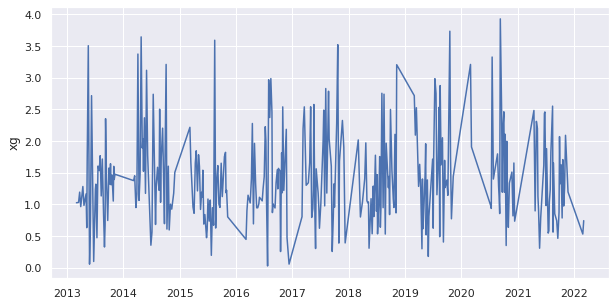

In [23]:
plt.plot(seared['date_formated'], seared['seaxgoals'])
plt.ylabel('xg')

Plot of xg differentiated, to obtain a stationary time series  

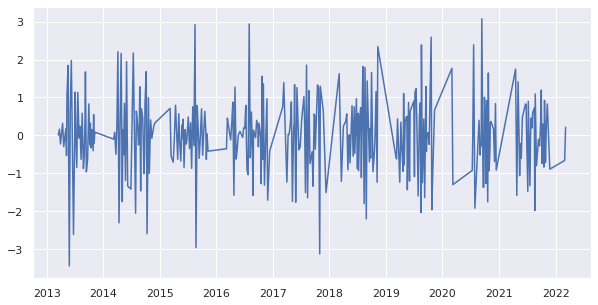

In [25]:
ts = seared['seaxgoals']
plt.plot(seared['date_formated'], ts.diff())

In [26]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Autocorrelation of the differentiated time series

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


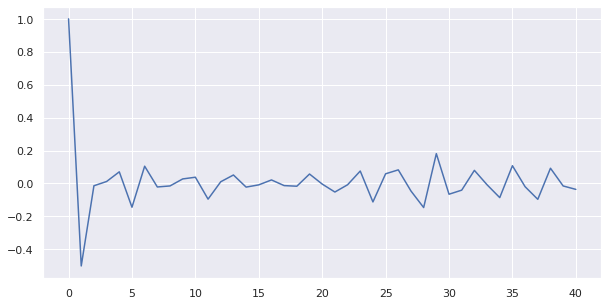

In [27]:
plt.plot(sm.tsa.stattools.acf(ts.diff()[1:]))

Partial Autocorrelation of the differentiated time series

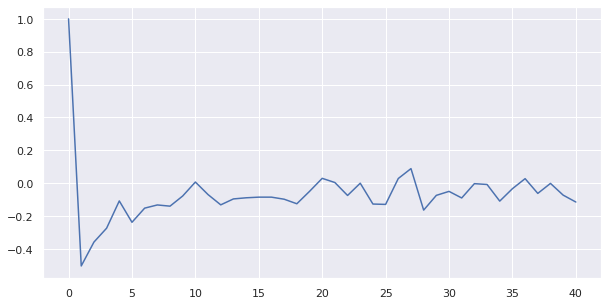

In [28]:
plt.plot(sm.tsa.stattools.pacf(ts.diff()[1:]))

Modeling the differentiated series as an ARIMA(1,0,1) 

In [29]:
mod = sm.tsa.ARIMA(ts.diff()[1:], order = (1,0,1))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              seaxgoals   No. Observations:                  328
Model:                     ARMA(1, 1)   Log Likelihood                -372.640
Method:                       css-mle   S.D. of innovations              0.747
Date:                Mon, 07 Mar 2022   AIC                            753.279
Time:                        21:37:50   BIC                            768.451
Sample:                             0   HQIC                           759.333
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0004      0.000      0.837      0.403      -0.000       0.001
ar.L1.seaxgoals     0.0099      0.055      0.178      0.859      -0.099       0.118
ma.L1.seaxgoals    -1.0000      

Modeling the differentiated series as an ARIMA(0,0,1), which gives a lower BIC 

In [30]:
mod = sm.tsa.ARIMA(ts.diff()[1:], order = (0,0,1))
res = mod.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:              seaxgoals   No. Observations:                  328
Model:                     ARMA(0, 1)   Log Likelihood                -372.655
Method:                       css-mle   S.D. of innovations              0.747
Date:                Mon, 07 Mar 2022   AIC                            751.311
Time:                        21:37:51   BIC                            762.690
Sample:                             0   HQIC                           755.851
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0004      0.000      0.845      0.399      -0.000       0.001
ma.L1.seaxgoals    -0.9999      0.010   -103.148      0.000      -1.019      -0.981
                                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
res.predict()

167    0.000367
328   -0.002300
327   -0.109167
166    0.090091
326   -0.181800
         ...   
2      0.505387
170    0.215889
1     -0.609169
0      0.284725
169    0.946299
Length: 328, dtype: float64

In [32]:
res.resid

167    0.005333
328    0.164300
327   -0.119633
166    0.227709
326   -0.117000
         ...   
2     -0.216187
170    0.611411
1     -0.285231
0     -0.948825
169   -0.735299
Length: 328, dtype: float64

Plotting the residuals of the model

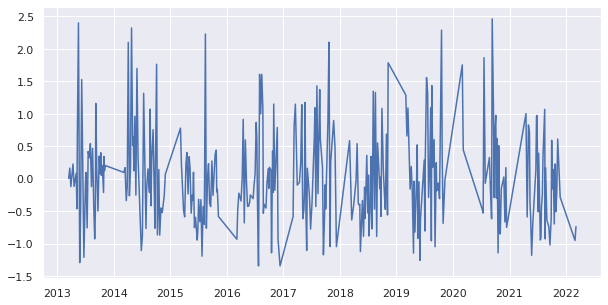

In [33]:
plt.plot(seared['date_formated'][1:], res.resid)

"Integrating" the previous model to analyze the original series

In [35]:
mod = sm.tsa.ARIMA(ts, order = (0,1,1))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.seaxgoals   No. Observations:                  328
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -372.655
Method:                       css-mle   S.D. of innovations              0.747
Date:                Mon, 07 Mar 2022   AIC                            751.311
Time:                        21:38:06   BIC                            762.690
Sample:                             1   HQIC                           755.851
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.000      0.845      0.399      -0.000       0.001
ma.L1.D.seaxgoals    -0.9999      0.010   -103.148      0.000      -1.019      -0.981
                        

Plotting the model's residuals

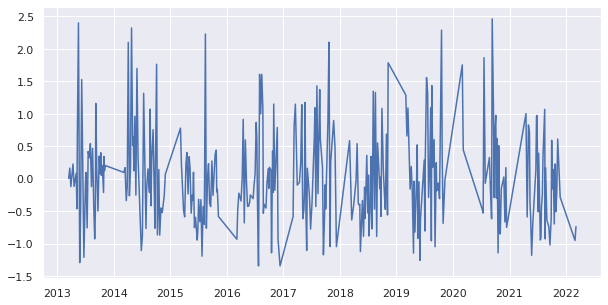

In [36]:
plt.plot(seared['date_formated'][1:], res.resid)

## Generalizing

Creating a function that assembles the time series 

In [41]:
 def construct_time_series(team_id):
    seasons = asa_client.get_game_xgoals(leagues='mls')
    seasons['date_formated'] = pd.to_datetime(seasons['date_time_utc'])

    seasons_team = seasons[(seasons['home_team_id']==team_id) | (seasons['away_team_id']==team_id)]
    team_home = seasons_team[seasons_team['home_team_id']==team_id]
    team_away = seasons_team[seasons_team['away_team_id']==team_id]

    team_home['teamxgoals'] = team_home['home_team_xgoals']
    team_away['teamxgoals'] = team_away['away_team_xgoals']

    team_home['teamgoals'] = team_home['home_goals']
    team_away['teamgoals'] = team_away['away_goals']

    team_home_red = team_home.loc[:, ['teamgoals', 'teamxgoals', 'date_formated']]
    team_away_red = team_away.loc[:, ['teamgoals', 'teamxgoals', 'date_formated']]

    team_red = pd.merge(team_home_red, team_away_red, how='outer')

    team_red = team_red.sort_values(by='date_formated')

    return team_red

nyc = construct_time_series('Vj58weDM8n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Creating the series for NYC

In [56]:
nyc_series = pd.Series(nyc['teamxgoals'].values, index=nyc['date_formated'])
nyc_series

date_formated
2015-03-08 21:00:00+00:00    0.5261
2015-03-15 21:00:00+00:00    2.9509
2015-03-21 20:00:00+00:00    0.4476
2015-03-28 23:00:00+00:00    0.8606
2015-04-11 20:00:00+00:00    1.2791
                              ...  
2021-12-01 00:30:00+00:00    1.3306
2021-12-05 20:00:00+00:00    1.4296
2021-12-11 20:00:00+00:00    0.9313
2022-02-27 22:00:00+00:00    0.6838
2022-03-05 23:00:00+00:00    1.8740
Length: 244, dtype: float64

Modeling with the same model as before

In [57]:
mod = sm.tsa.ARIMA(nyc_series, order = (0,1,1))
res = mod.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  243
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -280.277
Method:                       css-mle   S.D. of innovations              0.758
Date:                Mon, 07 Mar 2022   AIC                            566.554
Time:                        22:51:31   BIC                            577.033
Sample:                             1   HQIC                           570.775
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.619      0.107      -0.000       0.002
ma.L1.D.y     -1.0000      0.013    -77.082      0.000      -1.025      -0.975
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Predicting the next value

In [65]:
res.predict(start=(len(nyc_series)), end=(len(nyc_series)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


243   -0.213833
dtype: float64

Repeating the same game with MTL

In [68]:
construct_time_series('APk5LGOMOW')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,teamgoals,teamxgoals,date_formated
307,1,1.1778,2013-03-03 03:30:00+00:00
306,2,0.9120,2013-03-10 03:30:00+00:00
153,2,1.6904,2013-03-16 20:00:00+00:00
152,1,1.4220,2013-03-23 20:30:00+00:00
305,0,0.3808,2013-03-31 00:30:00+00:00
...,...,...,...
155,0,0.6292,2021-10-30 20:00:00+00:00
2,2,1.0133,2021-11-03 23:30:00+00:00
1,0,1.4027,2021-11-07 20:30:00+00:00
154,0,0.6738,2022-02-27 18:00:00+00:00


In [71]:
# def proyect_xgoals(team_id, n):
#     team = construct_time_series(team_id)
#     team_series = pd.Series(team['teamxgoals'].values, index=team['date_formated'])
#     mod = sm.tsa.ARIMA(team_series, order = (0,1,1))
#     res = mod.fit()
#     return res.predict(start=(len(team_series)), end=(len(team_series)+n)).values

# proyect_xgoals('APk5LGOMOW', 1)


In [70]:
team = construct_time_series('APk5LGOMOW')
team_series = pd.Series(team['teamxgoals'].values, index=team['date_formated'])
mod = sm.tsa.ARIMA(team_series, order = (0,1,1))
res = mod.fit()
res.predict(start=(len(team_series)), end=(len(team_series)+0)).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

array([0.77448997])

Predicting the score

In [72]:
np.random.poisson(0.77448997)

0

In [73]:
np.random.poisson(0)

0